In [5]:
import pandas as pd
data=pd.read_csv("C:\\Users\\CVR\\Downloads\\archive\\GlobalLandTemperaturesByCity.csv")
data.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


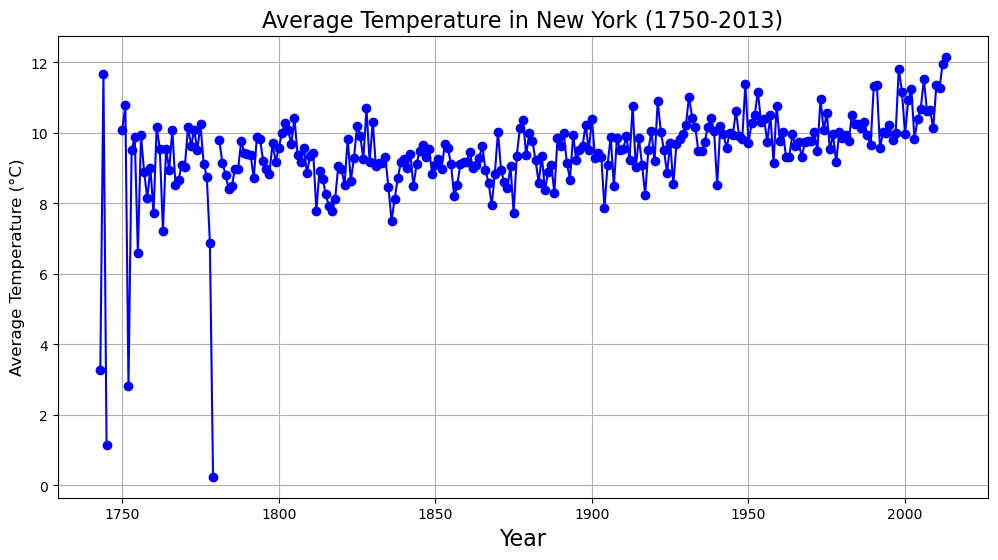

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
# Filter data for New York
city_data = data[data['City'] == 'New York'].copy()
# Convert 'dt' to datetime
city_data['dt'] = pd.to_datetime(city_data['dt'], errors='coerce')
# Extract the year from 'dt'
city_data['Year'] = city_data['dt'].dt.year
# Group by year and calculate the annual average temperature
annual_avg_temp = city_data.groupby('Year')['AverageTemperature'].mean().reset_index()
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(annual_avg_temp['Year'], annual_avg_temp['AverageTemperature'], linestyle='-', color='blue',marker='o')
plt.title('Average Temperature in New York (1750-2013)', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(True)
plt.show()

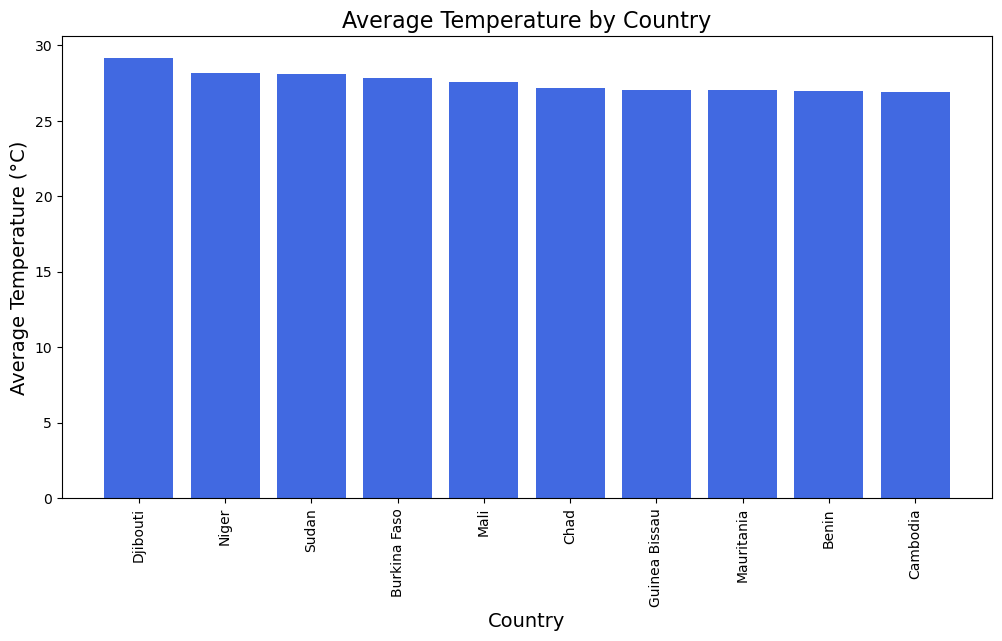

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
# Group by country and calculate the average temperature for each country
country_avg_temp = data.groupby('Country')['AverageTemperature'].mean().reset_index()
country_avg_temp=country_avg_temp.dropna()
# Sort by the average temperature to identify the hottest countries
country_avg_temp_sorted = country_avg_temp.sort_values(by='AverageTemperature', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(country_avg_temp_sorted['Country'], country_avg_temp_sorted['AverageTemperature'], color='royalblue')
plt.title('Average Temperature by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.xticks(rotation=90)  # Rotate country names to avoid overlap
#plt.grid()
plt.show()



In [ ]:
filter the data 
focus on a specific country and time range 
use the country column to select the country and convert dates for the time filtering
group data by year from the dt column and calculate the yearly distribution of temperatures

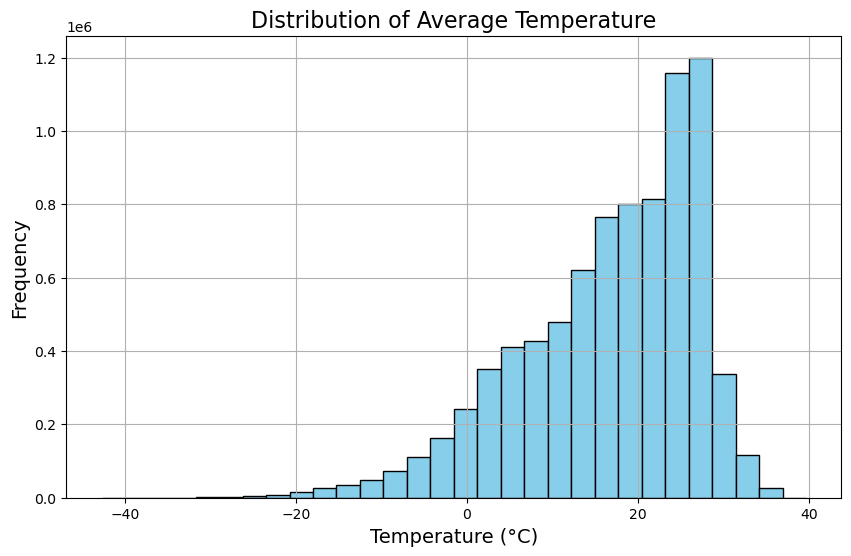

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
data_clean = data.dropna(subset=['AverageTemperature'])
plt.figure(figsize=(10, 6))
plt.hist(data_clean['AverageTemperature'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Temperature', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


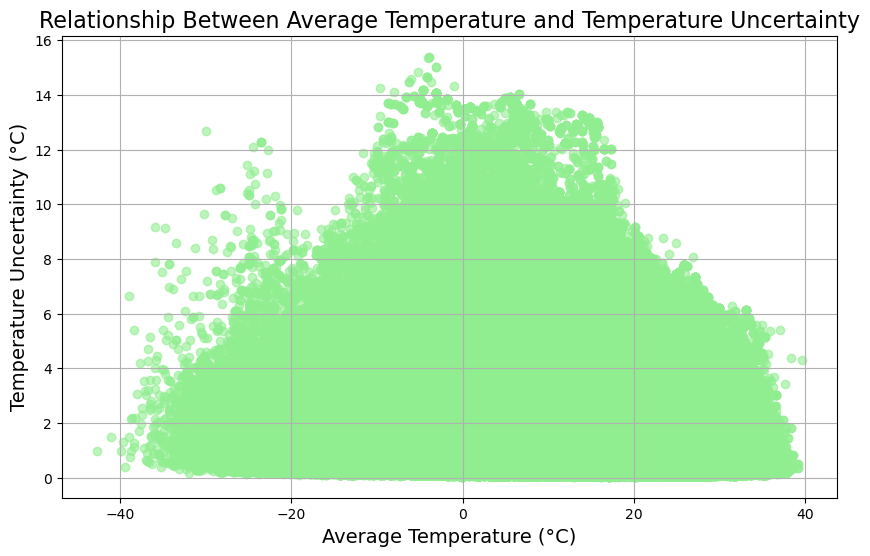

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
clean_data = data.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['AverageTemperature'], clean_data['AverageTemperatureUncertainty'], color='lightgreen', alpha=0.6)
plt.title('Relationship Between Average Temperature and Temperature Uncertainty', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=14)
plt.ylabel('Temperature Uncertainty (°C)', fontsize=14)
plt.grid(True)
plt.show()


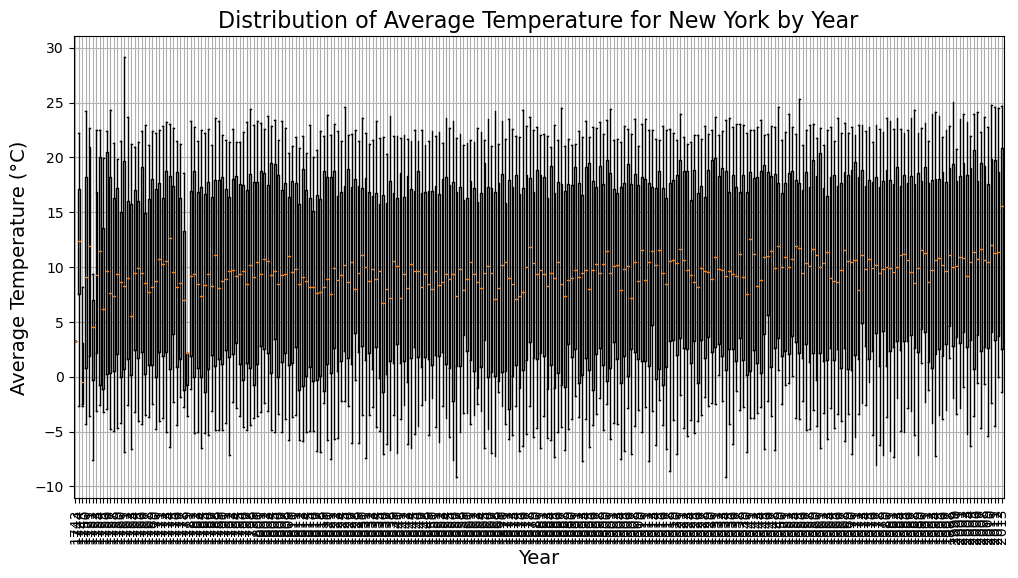

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
country_data = data[data['City'] == 'New York'].copy()
country_data['dt'] = pd.to_datetime(country_data['dt'], errors='coerce')
country_data['Year'] = country_data['dt'].dt.year
country_data_clean = country_data.dropna(subset=['AverageTemperature'])
plt.figure(figsize=(12, 6))
plt.boxplot([country_data_clean[country_data_clean['Year'] == year]['AverageTemperature'] 
             for year in sorted(country_data_clean['Year'].unique())], 
            labels=sorted(country_data_clean['Year'].unique()))
plt.title('Distribution of Average Temperature for New York by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


<Figure size 1200x600 with 0 Axes>

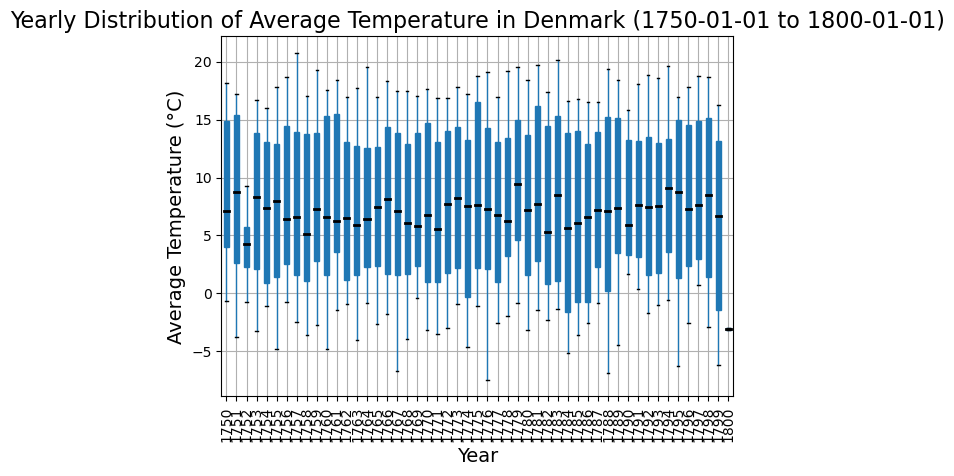

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
country_name = 'Denmark'  
start_date = '1750-01-01'
end_date = '1800-01-01'  
data['dt'] = pd.to_datetime(data['dt'], errors='coerce')
filtered_data = data[(data['Country'] == country_name) & 
                     (data['dt'] >= start_date) & 
                     (data['dt'] <= end_date)].copy()  
filtered_data['Year'] = filtered_data['dt'].dt.year 
yearly_stats = filtered_data.groupby('Year')['AverageTemperature'].describe()
plt.figure(figsize=(12, 6))
filtered_data.boxplot(column='AverageTemperature', by='Year', grid=True, patch_artist=True, 
                      medianprops=dict(color='black', linewidth=2))
plt.title(f'Yearly Distribution of Average Temperature in {country_name} ({start_date} to {end_date})', fontsize=16)
plt.suptitle('')  
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.xticks(rotation=90)
plt.show()


In [42]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [44]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


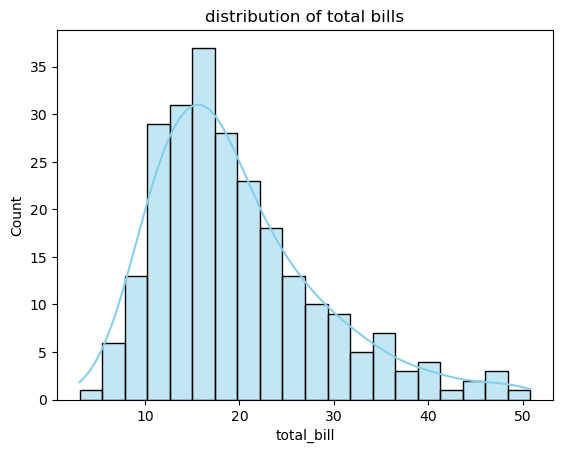

In [47]:
sns.histplot(data=tips,x='total_bill',kde=True,bins=20,color='skyblue')
plt.title("distribution of total bills")
plt.show()

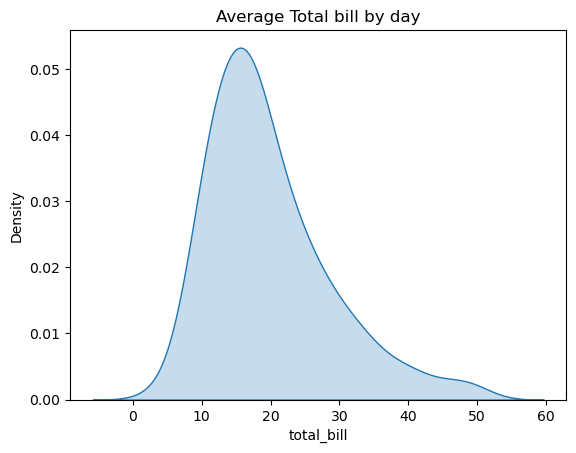

In [49]:
sns.kdeplot(data=tips,x="total_bill",fill=True)
plt.title("Average Total bill by day")
plt.show()

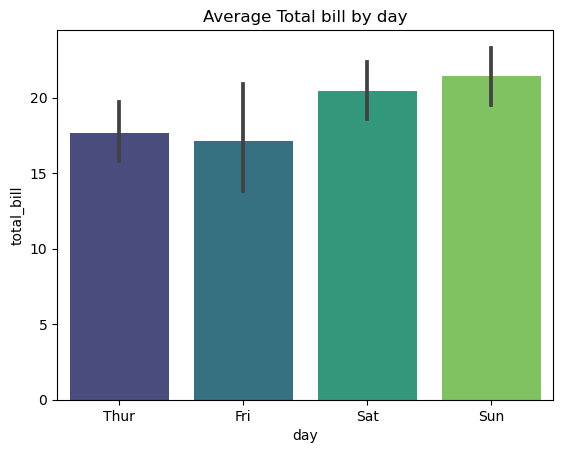

In [50]:
sns.barplot(data=tips,x="day",y="total_bill",palette="viridis")
plt.title("Average Total bill by day")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


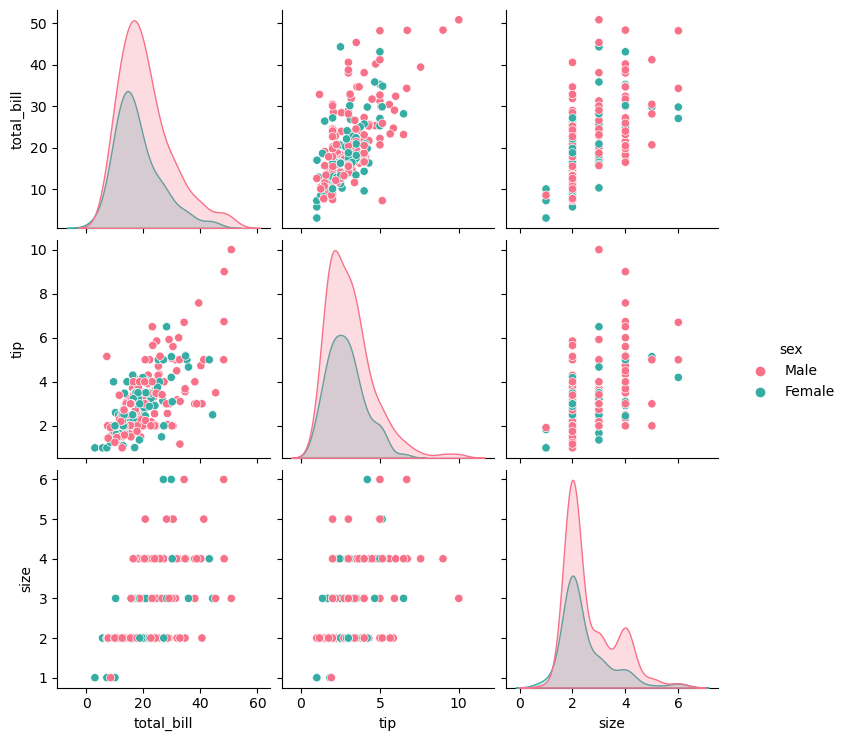

In [51]:
sns.pairplot(data=tips,hue="sex",palette="husl")
plt.show()

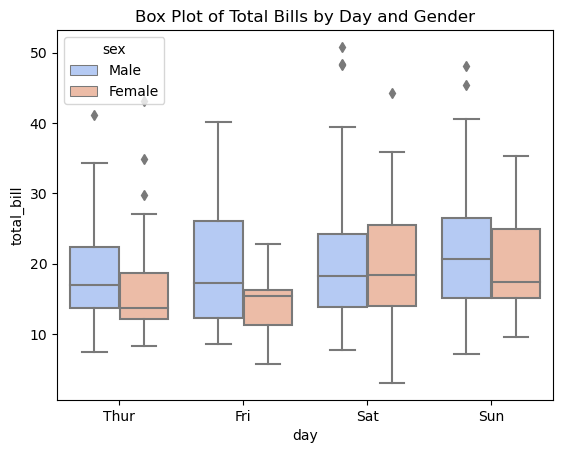

In [55]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex",palette="coolwarm")
plt.title("Box Plot of Total Bills by Day and Gender")
plt.show()

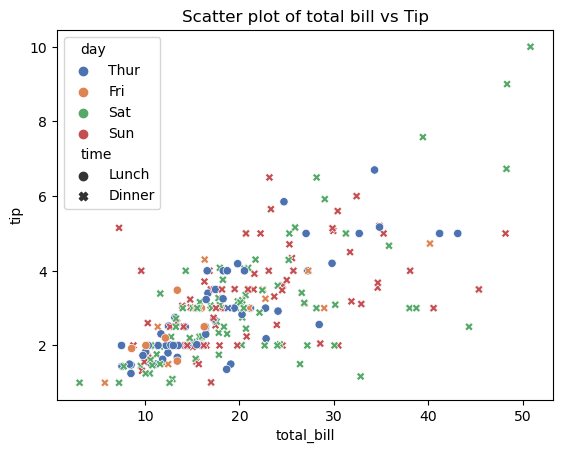

In [56]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="day",style="time",palette="deep")
plt.title("Scatter plot of total bill vs Tip")
plt.show()

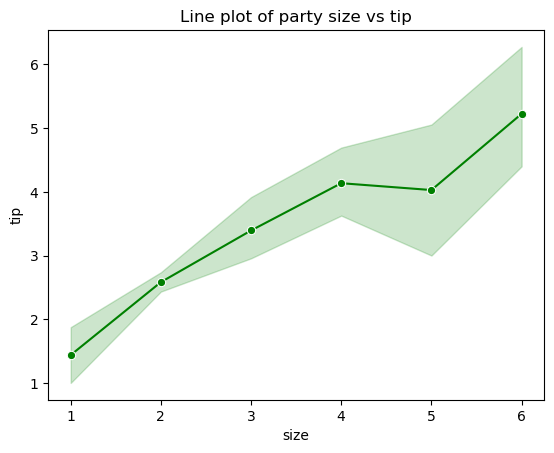

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
sns.lineplot(data=tips, x="size", y="tip", marker="o", color="green")
plt.title("Line plot of party size vs tip")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


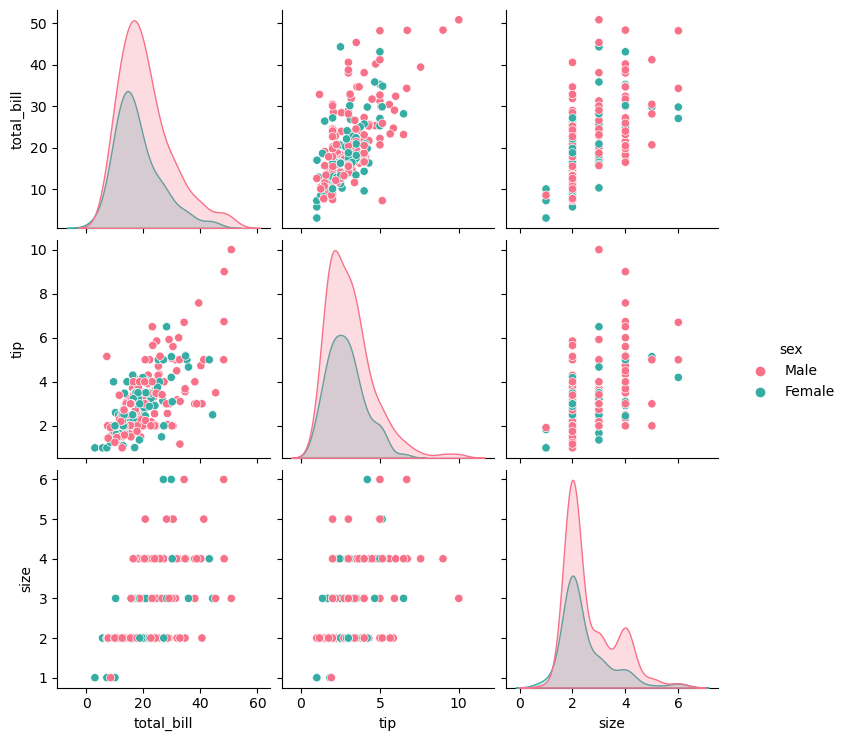

In [58]:
sns.pairplot(data=tips,hue="sex",palette="husl")
plt.show()


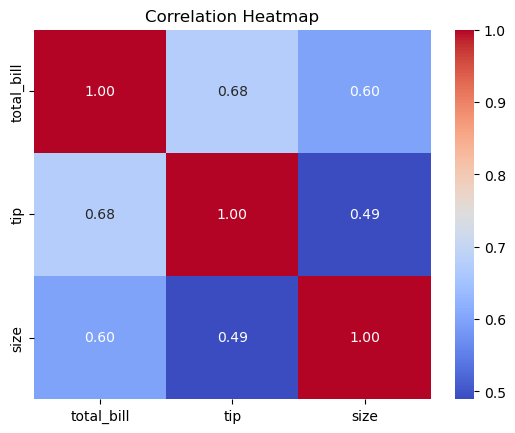

In [59]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
numeric_tips = tips.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_tips.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


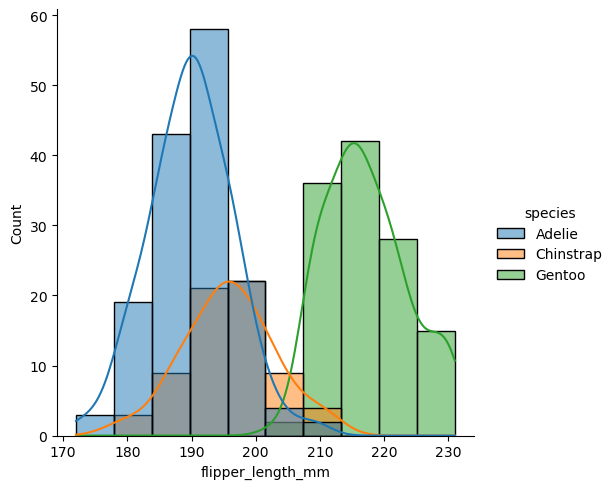

In [60]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm", hue="species", kde=True)